# Inference and analysis of cell-cell communication using CellChat

Pipeline adapted using: 
* https://htmlpreview.github.io/?https://github.com/sqjin/CellChat/blob/master/tutorial/CellChat-vignette.html
* https://htmlpreview.github.io/?https://github.com/sqjin/CellChat/blob/master/tutorial/Comparison_analysis_of_multiple_datasets.html

# Part I: Data input & processing and initialization of CellChat object
CellChat requires two user inputs: one is the gene expression data of cells, and the other is either user assigned cell labels (i.e., label-based mode) or a low-dimensional representation of the single-cell data (i.e., label-free mode). For the latter, CellChat automatically groups cells by building a shared neighbor graph based on the cell-cell distance in the low-dimensional space or the pseudotemporal trajectory space.

In [1]:
# Load the libraries
suppressPackageStartupMessages({
    library(CellChat)
    library(patchwork)
    library(Seurat)
    library(RColorBrewer)
})
options(stringsAsFactors = FALSE)
options(warn=-1)
set.seed(1234)

setwd("/work3/SingleCell/Arima")
options(stringsAsFactors = F)
source("src/functions_nagai.R")

In [2]:
package.version("CellChat")


[1] "1.6.1"

In [3]:
# Color pallete
color_palette1 <- brewer.pal(7, "Dark2")
color_palette2 <- brewer.pal(12, "Paired")
color_palette <- c(color_palette1, color_palette2)
color_palette
length(color_palette)

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"
 [8] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F"
[15] "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"

[1] 19

In [4]:
#load arima annotated
ari_org_integrated <- readRDS("data/ari_org/ari_org_annotated.rds")
ari_org_integrated$project <- "ari_org"

In [5]:
ari_org_integrated
class(ari_org_integrated)

An object of class Seurat 
81018 features across 17537 samples within 3 assays 
Active assay: SCT (27533 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, umap, tsne

[1] "Seurat"
attr(,"package")
[1] "SeuratObject"

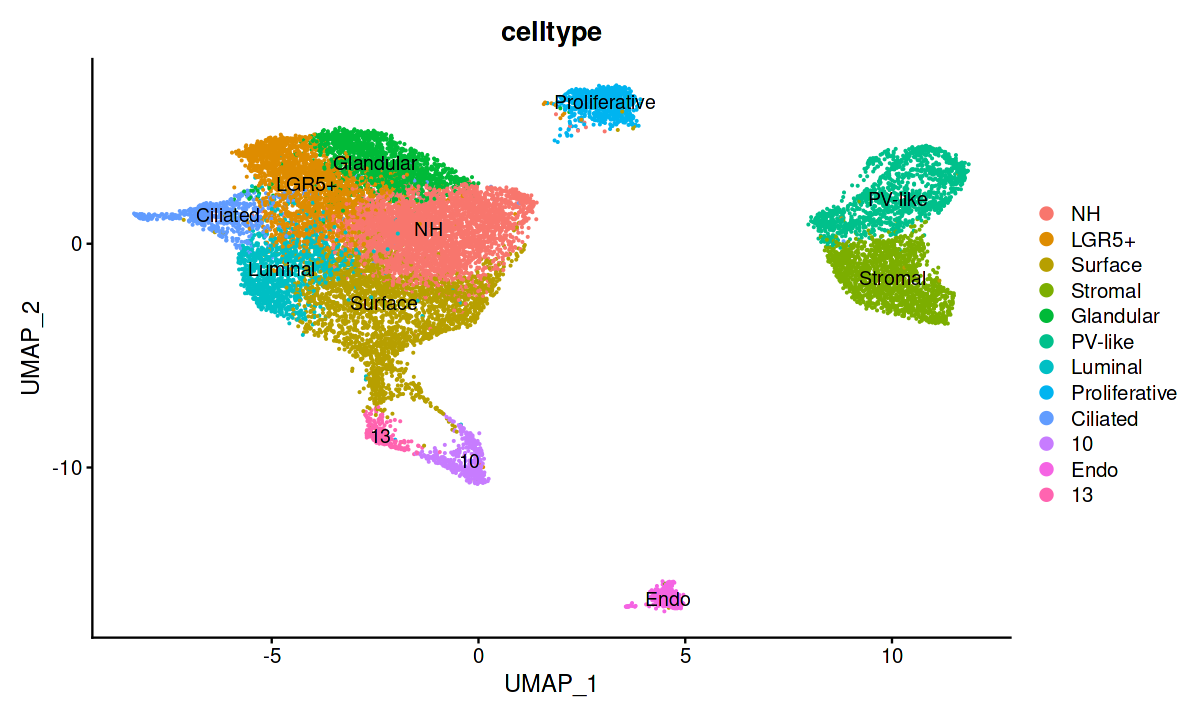

In [6]:
# Downsized dataset
plot.width = 10
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(ari_org_integrated, reduction = "umap", group.by = "celltype", label = TRUE)

In [7]:
# Confirm metadata to use
head(ari_org_integrated@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent_mt,percent_rb,nUMI,S.Score,G2M.Score,Phase,old.ident,⋯,integrated_snn_res.0.6,integrated_snn_res.0.7,integrated_snn_res.0.8,integrated_snn_res.0.9,integrated_snn_res.1,seurat_clusters,clusters,sample,project,celltype
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<fct>
AAACCCAAGAACCCGA-1_1,Arima_Pre1_con,8096,3786,0.04940711,0,8096,-0.01967306,0.002771246,G2M,Arima_Pre1_con,⋯,8,9,11,12,13,13,9,Arima_Pre1_con,ari_org,Ciliated
AAACCCAAGACATCAA-1_1,Arima_Pre1_con,6645,3199,0.01504891,0,6645,-0.08207534,-0.144767290,G1,Arima_Pre1_con,⋯,3,3,3,3,2,2,3,Arima_Pre1_con,ari_org,Stromal
AAACCCAAGCGACCCT-1_1,Arima_Pre1_con,8680,4231,0.00000000,0,8680,-0.24895522,-0.045133057,G1,Arima_Pre1_con,⋯,3,3,3,3,2,2,3,Arima_Pre1_con,ari_org,Stromal
AAACCCACAACGCCCA-1_1,Arima_Pre1_con,3434,2203,0.02912056,0,3434,-0.08238806,-0.034318665,G1,Arima_Pre1_con,⋯,1,1,0,0,0,0,1,Arima_Pre1_con,ari_org,LGR5+
AAACCCACATACCAGT-1_1,Arima_Pre1_con,7236,3560,0.00000000,0,7236,-0.13692964,0.007138058,G2M,Arima_Pre1_con,⋯,2,6,7,10,11,11,6,Arima_Pre1_con,ari_org,Luminal
AAACCCACATGGTACT-1_1,Arima_Pre1_con,6897,3404,0.05799623,0,6897,-0.06065387,0.014416079,G2M,Arima_Pre1_con,⋯,0,0,0,0,0,0,0,Arima_Pre1_con,ari_org,NH


In [8]:
so_list <- SplitObject(ari_org_integrated, split.by = "orig.ident")

In [9]:
table(so_list[[1]]$orig.ident)
table(so_list[[2]]$orig.ident)
table(so_list[[3]]$orig.ident)


Arima_Pre1_con 
          7288 


Arima_Pre1_hor 
          3607 


Arima_EMO6_hor 
          6642 

In [10]:
EMO6_hor <- so_list[[3]]
Pre1_con <- so_list[[1]]
Pre1_hor <- so_list[[2]]

In [11]:
table(ari_org_integrated$orig.ident)


Arima_EMO6_hor Arima_Pre1_con Arima_Pre1_hor 
          6642           7288           3607 

In [12]:
# Make CellChat objects

runPipeline <- function(seurat_object) {
  # Set identities
  Idents(object = seurat_object) <- seurat_object$celltype
  print("Starting the runPipeline for cellchat")
  
  # Get data input
  data.input <- GetAssayData(seurat_object) #, assay = "RNA", slot = "data") # uncomment if needed
  labels <- Idents(seurat_object)
  meta <- data.frame(labels = labels, row.names = names(labels))
  #print(meta)
    
  # Create CellChat object
  cellchat <- createCellChat(object = data.input, meta = meta, group.by = "labels")
  
  print("createCellChat ok")
  
  # Modify CellChat object
  #cellchat <- addMeta(cellchat, meta = meta, meta.name = "labels")
  #cellchat <- setIdent(cellchat, ident.use = "labels")
  
  # Get group size
  #groupSize <- as.numeric(table(cellchat@idents))
  
  # Subset data
  #cellchat <- subsetData(cellchat)
     
  cellchat <- addMeta(cellchat, meta = meta)
  levels(cellchat@idents) # show factor levels of the cell labels
  groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group
  print(unique(cellchat@idents))
  print(groupSize)
   
  # load database information
  CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
  showDatabaseCategory(CellChatDB)
  CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
  cellchat@DB <- CellChatDB.use
    
  cellchat <- subsetData(cellchat)
  cellchat <- identifyOverExpressedGenes(cellchat)
  cellchat <- identifyOverExpressedInteractions(cellchat)
    
  # project gene expression data onto PPI network (optional)
  cellchat <- projectData(cellchat, PPI.human)
    
  #Compute the communication probability and infer cellular communication network
  cellchat <- computeCommunProb(cellchat)
  print("computeCommunProb ok")
    
  # Filter out the cell-cell communication if there are only few number of cells in certain cell groups
  cellchat <- filterCommunication(cellchat, min.cells = 10)
  print("filterCommunication ok")
  
  #Infer the cell-cell communication at a signaling pathway level
  cellchat <- computeCommunProbPathway(cellchat)
  print("computeCommunProbPathway ok")
    
  #Calculate the aggregated cell-cell communication network
  cellchat <- aggregateNet(cellchat)
  print("aggregateNet ok")
    
  # Part IV
  # Compute the network centrality scores
  cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")  
  print("netAnalysis_computeCentrality ok")
    
  # Return CellChat object
  return(cellchat)
}

In [13]:
# Run pipeline for each sample
cc_EMO6_hor <- runPipeline(EMO6_hor)

[1] "Starting the runPipeline for cellchat"
[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  NH LGR5+ Surface Stromal Glandular PV-like Luminal Proliferative Ciliated 10 Endo 13 
[1] "createCellChat ok"
 [1] Proliferative NH            Stromal       LGR5+         Surface      
 [6] Luminal       13            PV-like       Glandular     10           
[11] Ciliated      Endo         
12 Levels: NH LGR5+ Surface Stromal Glandular PV-like Luminal ... 13
 [1] 1595  963 1146  438  536  298  586  350  141  397   40  152
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-12-01 19:19:00]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-12-01 19:21:29]"
[1] "computeCommunProb ok"
[1] "filterCommunication ok"
[1] "computeCommunProbPathway ok"
[1] "aggregateNet ok"
[

In [14]:
# We will use only EMO data
cellchat <- cc_EMO6_hor

In [16]:
# Analysis of the interactions between epithelial and stromal
pdf("results/2023-11-10_Revision2/circos_epi_vs_endo.pdf", width = 10, height = 10)

plot <- netVisual_chord_gene(cellchat, sources.use = c("Ciliated", "LGR5+","NH", "Surface", "Glandular", "Luminal", "Proliferative", "Surface", "10", "NH", "13"), 
                     targets.use = c("Endo"), lab.cex = 0.3,legend.pos.y = 30)
dev.off()

png 
  2

In [17]:
# Analysis of the interactions between epithelial and stromal
pdf("results/2023-11-10_Revision2/circos_epi_vs_stro.pdf", width = 10, height = 10)

plot <- netVisual_chord_gene(cellchat, sources.use = c("Ciliated", "LGR5+","NH", "Surface", "Glandular", "Luminal", "Proliferative", "Surface", "10", "NH", "13"), 
                     targets.use = c("Stromal", "PV-like"), lab.cex = 0.3,legend.pos.y = 30)
dev.off()

png 
  2